# Assignment Python 2

# Statistical Treatment for Retail Datasets

## Descriptive vs Inferential Statistics

**Statistik Deskriptif** digunakan untuk memperoleh informasi dari data (numerik dan visual) dan bertujuan untuk meringkas atau membuat *summary* dari data. Informasi yang diperoleh dari statistika deskriptif diantaranya adalah *measure of central tendency* (ukuran pemusatan data) dan *measure of spread* (ukuran penyebaran data)

**Statistik Inferensial** digunakan untuk menguji, memprediksi, dan membandingkan data. Statistik inferensial bertujuan untuk menarik kesimpulan data populasi menggunakan sampel. Statistika inferensial mencakup *probability distribution, confidence interval, hypothesis testing*, dan lain-lain. 

## Import Libraries

Library pada bahasa pemrograman Python berfungsi untuk memudahkan pengguna dalam membuat sebuah program tanpa harus menuliskan banyak kode. Untuk melakukan analisis deskriptif dan inferensia pada Python, dibutuhkan beberapa library. Library tersebut harus diimport terlebih dahulu agar dapat digunakan.

In [1]:
import pandas as pd
import numpy as np
import statistics
import scipy.stats
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
sns.set(color_codes=True)
import statsmodels.api as sm

Setelah proses import library selesai, maka langkah selanjutnya adalah mengimpor set data yang akan digunakan.

## Import Data

Set data yang digunakan pada kasus ini adalah data NYC Property Sales Dataset yang didapatkan dari situs Kaggle, set data berisikan setiap bangunan atau unit bangunan (apartment, dll) yang terjual di New York City selama periode 12 bulan.

Variabel-variabel pada set data adalah:

* **BOROUGH** : kode dari setiap wilayah properti berada. Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5)
* **BLOCK**;**LOT** : kode unik yang properti di NYC
* **BUILDING CLASS AT PRESENT** dan **BUILDING CLASS AT TIME OF SALE** : tipe bangunan

Set data diimport menggunakan fungsi `pd.read_csv` karena file yang digunakan memiliki format .csv dan disimpan dalam dataframe bernama `df_nyc`.

In [2]:
df_nyc = pd.read_csv('nyc-rolling-sales.csv')
df_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Fungsi `.head()` digunakan untuk melihat sebagian isi dari data. Secara default, fungsi `.head()` akan menampilkan 5 baris teratas dari data.

## Information From Data

Informasi mengenai jumlah dan nama kolom, jumlah baris, dan tipe data yang terkandung dalam set data dapat diketahui menggunakan fungsi `.info()`

In [3]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Dapat dilihat bahwa set data memiliki total 22 kolom dan 84547 baris. Tipe data setiap kolom dapat dilihat pada kolom `Dtype`.

## Preprocessing Data

Sebelum dilakukan proses analisis, set data perlu dipersiapkan terlebih dahulu.

Dilakukan penambahan kolom bernama `BOROUGH NAME` yang merupakan hasil dari replace pada data kolom BOROUGH menggunakan fungsi `.replace` .

* Kode 1 : Manhattan
* Kode 2 : Bronx
* Kode 3: Brooklyn
* Kode 4 : Queens
* Kode 5 : Staten Island

In [4]:
df_nyc['BOROUGH NAME'] = df_nyc.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Island"})

In [5]:
df_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH NAME
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,Manhattan
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00,Manhattan
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan


Dilakukan pengecekan nama kolom pada set data menggunakan fungsi `.columns` .

In [6]:
df_nyc.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'BOROUGH NAME'],
      dtype='object')

Pada set data terdapat beberapa kolom yang tidak digunakan, dilakukan drop kolom/hapus kolom menggunakan kode `.drop(['Unnamed: 0','BOROUGH','APARTMENT NUMBER','EASE-MENT'], axis=1,inplace=True)`. Kode axis=1 menandakan akan terjadi drop kolom month secara keseluruhan dan kode inplace=True digunakan untuk drop kolom secara permanen.

In [7]:
df_nyc.drop(['Unnamed: 0','BOROUGH','APARTMENT NUMBER','EASE-MENT'], axis=1,inplace=True)
df_nyc.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH NAME
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,Manhattan
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00,Manhattan
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan


Pada set data, tipe data pada kolom `SALE DATE` diubah menjadi tipe data date time.

In [8]:
df_nyc['SALE DATE'] = pd.to_datetime(df_nyc['SALE DATE'])

Untuk memudahkan proses analisis, kolom `LAND SQUARE FEET`, `GROSS SQUARE FEET`, dan `SALE PRICE` diubah menjadi numerik.

In [9]:
num_col = ["LAND SQUARE FEET","GROSS SQUARE FEET","SALE PRICE" ]

for col in num_col: 
    df_nyc[col] = pd.to_numeric(df_nyc[col],errors='coerce')

Dilakukan pengecekan duplikasi data menggunakan fungsi `.duplicated()`. Pada set data, terdapat sebanyak 765 duplikasi data.

In [10]:
dups = df_nyc.duplicated()
print(dups.any())
df_nyc.duplicated().sum()

True


765

Dilakukan proses drop pada data duplikasi menggunakan fungsi `.drop_duplicates()`. 

In [11]:
df_nyc = df_nyc.drop_duplicates().reset_index(drop=True)

Setelah proses drop selesai, dilakukan pengecekan kembali duplikasi data.

In [12]:
dups_2 = df_nyc.duplicated()
print(dups_2.any())
df_nyc.duplicated().sum()

False


0

Sudah tidak terdapat data yang terduplikasi, maka proses selanjutnya dapat dilakukan.

Dilakukan pengecekan data null pada set data menggunakan fungsi `.isnull().sum()`.

In [13]:
df_nyc.isnull().sum()

NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
BOROUGH NAME                          0
dtype: int64

Terdapat 26054 missing values pada kolom `LAND SQUARE FEET`, 27385 missing values pada kolom `GROSS SQUARE FEET` dan 14176 missing values pada kolom `SALE PRICE`.

Setelah itu dilakukan replace pada missing values data menggunakan NaN.

In [14]:
df_nyc = df_nyc.replace(['-',' '], np.NaN)
df_nyc.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH NAME
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,Manhattan
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,Manhattan
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,Manhattan
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,Manhattan
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,Manhattan


Dilakukan pengecekan kembali missing value pada set data.

In [15]:
df_nyc.isna().sum()

NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
BOROUGH NAME                          0
dtype: int64

NaN atau missing value pada kolom `TAX CLASS AT PRESENT` akan di-replace menggunakan modus dari kolom tersebut. Digunakan fungsi `.mode()` untuk mendapatkan modus atau nilai yang paling banyak muncul dari kolom

In [16]:
mod_tax = df_nyc['TAX CLASS AT PRESENT'].mode()
mod_tax

0    1
Name: TAX CLASS AT PRESENT, dtype: object

Proses replace NaN value pada kolom `TAX CLASS AT PRESENT` menggunakan fungsi `.replace(np.NaN, mod_tax[0])` .

* `np.NaN` : nilai lama yang akan di-replace
* `mod_tax[0]` : nilai baru yang akan me-replace

In [17]:
df_nyc['TAX CLASS AT PRESENT'] = df_nyc['TAX CLASS AT PRESENT'].replace(np.NaN, mod_tax[0])

NaN atau missing value pada kolom `BUILDING CLASS CLASS AT PRESENT` akan di-replace menggunakan modus dari kolom tersebut. Digunakan fungsi `.mode()` untuk mendapatkan modus atau nilai yang paling banyak muncul dari kolom

In [18]:
mod_build = df_nyc['BUILDING CLASS AT PRESENT'].mode()
mod_build

0    D4
Name: BUILDING CLASS AT PRESENT, dtype: object

Proses replace NaN value pada kolom `BULDING CLASS AT PRESENT` menggunakan fungsi `.replace(np.NaN, mod_build[0])` .

* `np.NaN` : nilai lama yang akan di-replace
* `mod_build[0]` : nilai baru yang akan me-replace

In [19]:
df_nyc['BUILDING CLASS AT PRESENT'] = df_nyc['BUILDING CLASS AT PRESENT'].replace(np.NaN, mod_build[0])

Dilakukan pengecekan kembali missing values pada set data.

In [20]:
df_nyc.isna().sum()

NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
BOROUGH NAME                          0
dtype: int64

Masih terdapat missing value pada kolom `LAND SQUARE FEET`, `GROSS SQUARE FEET`, dan `SALE PRICE`. Terdapat beberapa cara dalam penanganan missing value diantaranya menghapus baris yang memiliki missing value, mengisinya dengan nilai mean, median, atau modus, dan cara lainnya. Pada set data, jumlah missing value pada masing-masing kolom nilainya banyak sehingga digunakan alternatif lain dalam penanganan missing values. Penanganan missing value menggunakan alternatif lain yaitu median karena nilainya stabil dan tidak terpengaruh oleh nilai ouliers (pencilan).

Proses replace NaN value menggunakan fungsi `.replace()` .

* `np.NaN` : nilai lama yang akan di-replace
* `df_nyc[' '].median()` : nilai baru yang akan me-replace yaitu median masing-masing kolom

In [21]:
df_nyc['LAND SQUARE FEET'] = df_nyc['LAND SQUARE FEET'].replace(np.NaN, df_nyc['LAND SQUARE FEET'].median())
df_nyc['GROSS SQUARE FEET'] = df_nyc['GROSS SQUARE FEET'].replace(np.NaN, df_nyc['GROSS SQUARE FEET'].median())
df_nyc['SALE PRICE'] = df_nyc['SALE PRICE'].replace([np.NaN,0], df_nyc['SALE PRICE'].median())

Dilakukan pengecekan kembali missing values pada set data.

In [22]:
df_nyc.isna().sum()

NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
BOROUGH NAME                      0
dtype: int64

Sudah tidak terdapat missing value pada set data, proses analisis dapat dilanjutkan.

## Measure of Central Tendency

Central tendency adalah ukuran nilai yang menunjukkan titik tengah dari sebuah data yang berguna untuk mengetahui posisi banyak nilai data berkumpul pada distribusi. Ukuran central tendency yang umum digunakan adalah mean, median, dan modus.


### Mean

Mean atau rata-rata adalah nilai tengah dari data yang didapatkan dengan cara menjumlahkan seluruh nilai pada data kemudian dibagi dengan banyaknya data.

$ \bar x = \frac {x_1 + x_2 + ... + x_n}{n}$

* $x_1,x_2,...,x_n$ : nilai pada data
* $n$ : banyaknya data

Mean ada beberapa jenis diantaranya arithmetic mean, geometric mean, dan harmonic mean. Namun, yang umum digunakan adalah arithmetic mean.

#### Case 1

Ingin diketahui rata-rata (mean) harga penjualan properti (SALE PRICE) di NYC dan rata-rata (mean) harga penjualan properti setiap wilayah selama 12 bulan.

Untuk mendapatkan rata-rata kolom `SALE PRICE`, perlu dilakukan slicing pada data frame `df_nyc` berdasarkan kolom `SALE PRICE`. Kemudian digunakan fungsi `.mean()` untuk mendapatkan mean atau rata-rata dari kolom tersebut.

In [23]:
#mean NYC

mean_nyc =df_nyc['SALE PRICE'].mean()
mean_nyc

1217885.4629459437

Untuk mendapatkan rata-rata kolom `SALE PRICE` pada wilayah Manhattan, data frame `df_nyc` perlu di-slicing terlebih dahulu menggunakan fungsi `.loc` dengan syarat `['BOROUGH NAME'] == Manhattan`. Setelah itu, digunakan fungsi `.mean()` untuk mendapatkan mean atau rata-rata dari kolom `SALE PRICE` dengan syarat `BOROUGH NAME == Manhattan`.

In [24]:
#mean Manhattan

df_manhattan = df_nyc.loc[(df_nyc['BOROUGH NAME'] == 'Manhattan')]
mean_manhattan = df_manhattan['SALE PRICE'].mean()
mean_manhattan

2765600.9200088386

Untuk mendapatkan rata-rata kolom `SALE PRICE` pada wilayah Bronx, data frame `df_nyc` perlu di-slicing terlebih dahulu menggunakan fungsi `.loc` dengan syarat `['BOROUGH NAME'] == Bronx`. Setelah itu, digunakan fungsi `.mean()` untuk mendapatkan mean atau rata-rata dari kolom `SALE PRICE` dengan syarat `BOROUGH NAME == Bronx`.

In [25]:
#mean Bronx

df_bronx = df_nyc.loc[(df_nyc['BOROUGH NAME'] == 'Bronx')]
mean_bronx = df_bronx['SALE PRICE'].mean()
mean_bronx

733833.2522161853

Untuk mendapatkan rata-rata kolom `SALE PRICE` pada wilayah Brooklyn, data frame `df_nyc` perlu di-slicing terlebih dahulu menggunakan fungsi `.loc` dengan syarat `['BOROUGH NAME'] == Brooklyn`. Setelah itu, digunakan fungsi `.mean()` untuk mendapatkan mean atau rata-rata dari kolom `SALE PRICE` dengan syarat `BOROUGH NAME == Brooklyn`.

In [26]:
#mean Brooklyn

df_brooklyn = df_nyc.loc[(df_nyc['BOROUGH NAME'] == 'Brooklyn')]
mean_brooklyn = df_brooklyn['SALE PRICE'].mean()
mean_brooklyn

1024077.900809462

Untuk mendapatkan rata-rata kolom `SALE PRICE` pada wilayah Queens, data frame `df_nyc` perlu di-slicing terlebih dahulu menggunakan fungsi `.loc` dengan syarat `['BOROUGH NAME'] == Queens`. Setelah itu, digunakan fungsi `.mean()` untuk mendapatkan mean atau rata-rata dari kolom `SALE PRICE` dengan syarat `BOROUGH NAME == Queens`.

In [27]:
#mean Queens

df_queens = df_nyc.loc[(df_nyc['BOROUGH NAME'] == 'Queens')]
mean_queens = df_queens['SALE PRICE'].mean()
mean_queens

675771.5737908693

Untuk mendapatkan rata-rata kolom `SALE PRICE` pada wilayah Staten Island, data frame `df_nyc` perlu di-slicing terlebih dahulu menggunakan fungsi `.loc` dengan syarat `['BOROUGH NAME'] == Staten Island`. Setelah itu, digunakan fungsi `.mean()` untuk mendapatkan mean atau rata-rata dari kolom `SALE PRICE` dengan syarat `BOROUGH NAME == Staten Island`.

In [28]:
#mean Staten Island

df_staten = df_nyc.loc[(df_nyc['BOROUGH NAME'] == 'Staten Island')]
mean_staten = df_staten['SALE PRICE'].mean()
mean_staten

540656.5805207329

Untuk memudahkan proses interpretasi, mean kolom `SALE PRICE` di NYC dan masing-masing wilayah dirangkum pada sebuah data frame baru.

In [29]:
mean_ = {'mean':[mean_nyc,mean_manhattan,mean_bronx,mean_brooklyn,mean_queens,mean_staten]}
mean = pd.DataFrame(mean_, index=['NYC','Manhattan','Bronx','Brooklyn','Queens','Staten Island'])
mean

,mean
NYC,1.217885e+06
Manhattan,2.765601e+06
Bronx,7.338333e+05
Brooklyn,1.024078e+06
Queens,6.757716e+05
Staten Island,5.406566e+05


**Interpretasi:** 

Berdasarkan hasil perhitungan, diketahui bahwa:
- Rata-rata harga penjualan properti di NYC sebesar 1217885.5 USD. 
- Rata-rata harga penjualan properti di wilayah Manhattan sebesar 2765600 USD.
- Rata-rata harga penjualan properti di wilayah Bronx sebesar 733833.3 USD.
- Rata-rata harga penjualan properti di wilayah Brooklyn sebesar 1024078 USD.
- Rata-rata harga penjualan properti di wilayah Queens sebesar 675771.6 USD.
- Rata-rata harga penjualan properti di wilayah Staten Island sebesar 540656.6 USD.

### Median

Median adalah nilai tengah dari data yang membagi data tersebut menjadi dua bagian sama besar. Untuk memperoleh nilai median, data perlu diurutkan dari yang terkecil hingga terbesar.

#### Case 2

Ingin diketahui median harga penjualan properti (SALE PRICE) di NYC dan median harga penjualan property setiap wilayah selama 12 bulan.

Untuk mendapatkan median kolom `SALE PRICE`, perlu dilakukan slicing pada data frame `df_nyc` berdasarkan kolom `SALE PRICE`. Kemudian digunakan fungsi `.median()` untuk mendapatkan median dari kolom tersebut.

In [30]:
#median NYC

median_nyc =df_nyc['SALE PRICE'].median()
median_nyc

533000.0

Untuk mendapatkan median kolom `SALE PRICE` pada wilayah Manhattan, data frame `df_nyc` perlu di-slicing terlebih dahulu menggunakan fungsi `.loc` dengan syarat `['BOROUGH NAME'] == Manhattan`. Setelah itu, digunakan fungsi `.median()` untuk mendapatkan median dari kolom `SALE PRICE` dengan syarat `BOROUGH NAME == Manhattan`.

In [31]:
#median Manhattan

df_manhattan = df_nyc.loc[(df_nyc['BOROUGH NAME'] == 'Manhattan')]
median_manhattan = df_manhattan['SALE PRICE'].median()
median_manhattan

849444.0

Untuk mendapatkan median kolom `SALE PRICE` pada wilayah Bronx, data frame `df_nyc` perlu di-slicing terlebih dahulu menggunakan fungsi `.loc` dengan syarat `['BOROUGH NAME'] == Bronx`. Setelah itu, digunakan fungsi `.median()` untuk mendapatkan median dari kolom `SALE PRICE` dengan syarat `BOROUGH NAME == Bronx`.

In [32]:
#median Bronx

df_bronx = df_nyc.loc[(df_nyc['BOROUGH NAME'] == 'Bronx')]
median_bronx = df_bronx['SALE PRICE'].median()
median_bronx

517000.0

Untuk mendapatkan median kolom `SALE PRICE` pada wilayah Brooklyn data frame `df_nyc` perlu di-slicing terlebih dahulu menggunakan fungsi `.loc` dengan syarat `['BOROUGH NAME'] == Brooklyn`. Setelah itu, digunakan fungsi `.median()` untuk mendapatkan median dari kolom `SALE PRICE` dengan syarat `BOROUGH NAME == Brooklyn`.

In [33]:
#median Brooklyn

df_brooklyn = df_nyc.loc[(df_nyc['BOROUGH NAME'] == 'Brooklyn')]
median_brooklyn = df_brooklyn['SALE PRICE'].median()
median_brooklyn

533000.0

Untuk mendapatkan median kolom `SALE PRICE` pada wilayah Queens, data frame `df_nyc` perlu di-slicing terlebih dahulu menggunakan fungsi `.loc` dengan syarat `['BOROUGH NAME'] == Queens`. Setelah itu, digunakan fungsi `.median()` untuk mendapatkan median dari kolom `SALE PRICE` dengan syarat `BOROUGH NAME == Queens`.

In [34]:
#mean Queens

df_queens = df_nyc.loc[(df_nyc['BOROUGH NAME'] == 'Queens')]
median_queens = df_queens['SALE PRICE'].median()
median_queens

533000.0

Untuk mendapatkan median kolom `SALE PRICE` pada wilayah Staten Island, data frame `df_nyc` perlu di-slicing terlebih dahulu menggunakan fungsi `.loc` dengan syarat `['BOROUGH NAME'] == Staten Island`. Setelah itu, digunakan fungsi `.median()` untuk mendapatkan median dari kolom `SALE PRICE` dengan syarat `BOROUGH NAME == Staten Island`.

In [35]:
#mean Staten Island

df_staten = df_nyc.loc[(df_nyc['BOROUGH NAME'] == 'Staten Island')]
median_staten = df_staten['SALE PRICE'].median()
median_staten

533000.0

Untuk memudahkan proses interpretasi, median kolom `SALE PRICE` di NYC dan masing-masing wilayah dirangkum pada sebuah data frame baru.

In [36]:
median_ = {'median':[median_nyc, median_manhattan, median_bronx, median_brooklyn, median_queens, median_staten]}
median = pd.DataFrame(median_, index=['NYC','Manhattan','Bronx','Brooklyn','Queens','Staten Island'])
median

,median
NYC,533000.0
Manhattan,849444.0
Bronx,517000.0
Brooklyn,533000.0
Queens,533000.0
Staten Island,533000.0


**Interpretasi:** 

Berdasarkan hasil perhitungan, diketahui bahwa:
- Median harga penjualan properti di NYC sebesar 533000 USD. 
- Median harga penjualan properti di wilayah Manhattan sebesar 84944 USD.
- Median harga penjualan properti di wilayah Bronx sebesar 517000 USD.
- Median harga penjualan properti di wilayah Brooklyn sebesar 533000 USD.
- Median harga penjualan properti di wilayah Queens sebesar 533000 USD.
- Median harga penjualan properti di wilayah Staten Island sebesar 533000 USD.

### Mode

Modus atau mode adalah nilai yang paling sering muncul pada data.

#### Case 3

Ingin diketahui building class category yang paling banyak dijual di NYC dan building class category yang paling banyak dijual setiap wilayah selama 12 bulan.

Untuk mendapatkan modus kolom `BUILDING CLASS CATEGORY`, perlu dilakukan slicing pada data frame df_nyc berdasarkan kolom `BUILDING CLASS CATEGORY`. Kemudian digunakan fungsi `.mode()` untuk mendapatkan modus dari kolom tersebut.

In [37]:
#mode NYC

mode_nyc = df_nyc['BUILDING CLASS CATEGORY'].mode()
mode_nyc

0    01 ONE FAMILY DWELLINGS                    
Name: BUILDING CLASS CATEGORY, dtype: object

Untuk mendapatkan modus kolom `BUILDING CLASS CATEGORY` pada wilayah Manhattan, data frame `df_nyc` perlu di-slicing terlebih dahulu menggunakan fungsi `.loc` dengan syarat `['BOROUGH NAME'] == Manhattan`. Setelah itu, digunakan fungsi `.mode()` untuk mendapatkan modus dari kolom `BUILDING CLASS CATEGORY` dengan syarat `BOROUGH NAME == Manhattan`.

In [38]:
#mode Manhattan

df_manhattan = df_nyc.loc[(df_nyc['BOROUGH NAME'] == 'Manhattan')]
mode_manhattan = df_manhattan['BUILDING CLASS CATEGORY'].mode()
mode_manhattan

0    13 CONDOS - ELEVATOR APARTMENTS            
Name: BUILDING CLASS CATEGORY, dtype: object

Untuk mendapatkan modus kolom `BUILDING CLASS CATEGORY` pada wilayah Bronx, data frame `df_nyc` perlu di-slicing terlebih dahulu menggunakan fungsi `.loc` dengan syarat `['BOROUGH NAME'] == Bronx`. Setelah itu, digunakan fungsi `.mode()` untuk mendapatkan modus dari kolom `BUILDING CLASS CATEGORY` dengan syarat `BOROUGH NAME == Bronx`.

In [39]:
#mode Bronx

df_bronx = df_nyc.loc[(df_nyc['BOROUGH NAME'] == 'Bronx')]
mode_bronx = df_bronx['BUILDING CLASS CATEGORY'].mode()
mode_bronx

0    02 TWO FAMILY DWELLINGS                    
Name: BUILDING CLASS CATEGORY, dtype: object

Untuk mendapatkan modus kolom `BUILDING CLASS CATEGORY` pada wilayah Brooklyn, data frame `df_nyc` perlu di-slicing terlebih dahulu menggunakan fungsi `.loc` dengan syarat `['BOROUGH NAME'] == Brooklyn`. Setelah itu, digunakan fungsi `.mode()` untuk mendapatkan modus dari kolom `BUILDING CLASS CATEGORY` dengan syarat `BOROUGH NAME == Brooklyn`.

In [40]:
#mode Brooklyn

df_brooklyn = df_nyc.loc[(df_nyc['BOROUGH NAME'] == 'Brooklyn')]
mode_brooklyn = df_brooklyn['BUILDING CLASS CATEGORY'].mode()
mode_brooklyn

0    02 TWO FAMILY DWELLINGS                    
Name: BUILDING CLASS CATEGORY, dtype: object

Untuk mendapatkan modus kolom `BUILDING CLASS CATEGORY` pada wilayah Queens, data frame `df_nyc` perlu di-slicing terlebih dahulu menggunakan fungsi `.loc` dengan syarat `['BOROUGH NAME'] == Queens`. Setelah itu, digunakan fungsi `.mode()` untuk mendapatkan modus dari kolom `BUILDING CLASS CATEGORY` dengan syarat `BOROUGH NAME == Queens`.

In [41]:
#mode Queens

df_queens = df_nyc.loc[(df_nyc['BOROUGH NAME'] == 'Queens')]
mode_queens = df_queens['BUILDING CLASS CATEGORY'].mode()
mode_queens

0    01 ONE FAMILY DWELLINGS                    
Name: BUILDING CLASS CATEGORY, dtype: object

Untuk mendapatkan modus kolom `BUILDING CLASS CATEGORY` pada wilayah Staten Island, data frame `df_nyc` perlu di-slicing terlebih dahulu menggunakan fungsi `.loc` dengan syarat `['BOROUGH NAME'] == Staten Island`. Setelah itu, digunakan fungsi `.mode()` untuk mendapatkan modus dari kolom `BUILDING CLASS CATEGORY` dengan syarat `BOROUGH NAME == Staten Island`.

In [42]:
#mode Staten Island

df_staten = df_nyc.loc[(df_nyc['BOROUGH NAME'] == 'Staten Island')]
mode_staten = df_staten['BUILDING CLASS CATEGORY'].mode()
mode_staten

0    01 ONE FAMILY DWELLINGS                    
Name: BUILDING CLASS CATEGORY, dtype: object

Untuk memudahkan proses interpretasi, median kolom `BUILDING CLASS CATEGORY` di NYC dan masing-masing wilayah dirangkum pada sebuah data frame baru.

In [43]:
mode_ = {'mode':[mode_nyc, mode_manhattan, mode_bronx, mode_brooklyn, mode_queens, mode_staten]}
mode = pd.DataFrame(mode_, index=['NYC','Manhattan','Bronx','Brooklyn','Queens','Staten Island'])
mode

,mode
NYC,0 01 ONE FAMILY DWELLINGS ...
Manhattan,0 13 CONDOS - ELEVATOR APARTMENTS ...
Bronx,0 02 TWO FAMILY DWELLINGS ...
Brooklyn,0 02 TWO FAMILY DWELLINGS ...
Queens,0 01 ONE FAMILY DWELLINGS ...
Staten Island,0 01 ONE FAMILY DWELLINGS ...


**Interpretasi:**

Berdasarkan hasil perhitungan, didapatkan bahwa:

- Kategori kelas bangunan yang paling banyak dijual di NYC adalah ONE FAMILY DWELLINGS
- Kategori kelas bangunan yang paling banyak dijual di wilayah Manhattan adalag CONDOS - ELEVATOR APARTMENTS
- Kategori kelas bangunan yang paling banyak dijual di wilayah Bronx adalah TWO FAMILY DWELLINGS
- Kategori kelas bangunan yang paling banyak dijual di wilayah Brooklyn adalah TWO FAMILY DWELLINGS
- Kategori kelas bangunan yang paling banyak dijual di wilayah Queens adalah ONE FAMILY DWELLINGS
- Kategori kelas bangunan yang paling banyak dijual di wilayah Staten Island adalah ONE FAMILY DWELLINGS

## Measure of Spread

Measure of spread adalah cara yang digunakan untuk mendeskripsikan penyebaran data. Umumnya pengukuran persebaran data menggunakan range, variance, dan standard deviation.

### Case 4

Ingin diketahui persebaran data penjualan properti di NYC selama 12 bulan.

### Range

Range adalah selisih antara nilai minimum dan maksimum pada sebuah data.

Untuk mengetahui selisih dari nilai `SALE PRICE` pada data, digunakan fungsi `np.ptp()` yang berasal dari library numpy.

In [44]:
range_ = np.ptp(df_nyc['SALE PRICE'])
range_

2209999999.0

### Variance

Variance atau ragam adalah nilai rata-rata perbedaan kuadrat yang digunakan untuk menentuukan kedekatan sebaran data pada sampel dan kedekatan nilai individu data terhadap mean sampel.

Variance dapat dihitung menggunakan fungsi `np.var()` yang berasal dari library numpy.

In [45]:
var = np.var(df_nyc['SALE PRICE'],ddof=1)
var

108508017937508.36

### Standard Deviation

Standard Deviation adalah akar kuadrat dari variance yaitu ukuran yang menunjukkan seberapa besar variasi rata-rata.

Standard Deviation dapat dihitung menggunakan fungsi `np.std()` yang berasal dari library numpy.

In [46]:
sd = np.std(df_nyc['SALE PRICE'],ddof=1)
sd

10416718.19420629

Untuk memudahkan proses interpretasi, Measure of Spread kolom `SALE PRICE` pada data frame `df_nyc` dirangkum pada sebuah data frame baru.

In [47]:
measurement = {'NYC' : [range_,var,sd]}
mse = pd.DataFrame(measurement,index=['Range','Variance','Standard Deviation'])
mse

,NYC
Range,2.210000e+09
Variance,1.085080e+14
Standard Deviation,1.041672e+07


**Interpretasi:**

Berdasarkan hasil perhitungan, didapatkan bahwa:

- Range atau selisih dari nilai maksimum dan nilai minimum harga jual properti di NYC adalah 2209999999 USD.
- Variance atau ragam dari harga jual properti di NYC adalah 108508017937508.4 USD.
- Standard Deviation atau simpangan baku harga jual properti di NYC adalah 10416718.2 USD.

## Probability Distribution

Peluang atau probabilitas adalah banyaknya kejadian atau peristiwa yang muncul dengan banyaknya atau semua kejadian yang mungkin muncul. Distribusi peluang adalah munculnya suatu peristiwa terjadi atau tidak terjadi secara berkali-kali atau banyak sekali sehingga peluang dapat disusun. Distribusi peluang terbagi menjadi dua jenis yaitu distribusi peluang diskrit dan distribusi peluang kontinu.

### Case 5

Ingin diketahui sebaran peluang dari data harga penjualan properti di NYC pada rentang harga 500000 USD hingga 10000000 USD.

Untuk mendapatkan data pada kolom `SALE PRICE` dengan syarat tertentu perlu dilakukan slicing pada data frame df_nyc berdasarkan kolom `SALE PRICE` dengan syarat data dari kolom `SALE PRICE` bernilai lebih dari 500000 USD dan kurang dari 10000000 USD. Data kemudian disimpan dalam dataframe bernama `sale`.

In [48]:
sale = df_nyc[(df_nyc['SALE PRICE'] > 500000) & (df_nyc['SALE PRICE'] < 10000000)]
sale

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH NAME
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,Manhattan
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,533000.0,2016-12-14,Manhattan
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,533000.0,2016-12-09,Manhattan
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,Manhattan
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83774,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,85,B2,137 DARNELL LANE,10309,2,0,2,3016.0,1300.0,1995,1,B2,533000.0,2016-12-30,Staten Island
83775,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,125 DARNELL LANE,10309,2,0,2,3325.0,1300.0,1995,1,B2,509000.0,2016-10-31,Staten Island
83776,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,112 ROBIN COURT,10309,2,0,2,11088.0,2160.0,1994,1,B2,648000.0,2016-12-07,Staten Island
83777,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,B9,41 SONIA COURT,10309,2,0,2,3020.0,1800.0,1997,1,B9,533000.0,2016-12-01,Staten Island


Untuk membentuk sebuah plot distribusi peluang, digunakan fungsi `sns.distplot()` yang berasal dari library seaborn.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

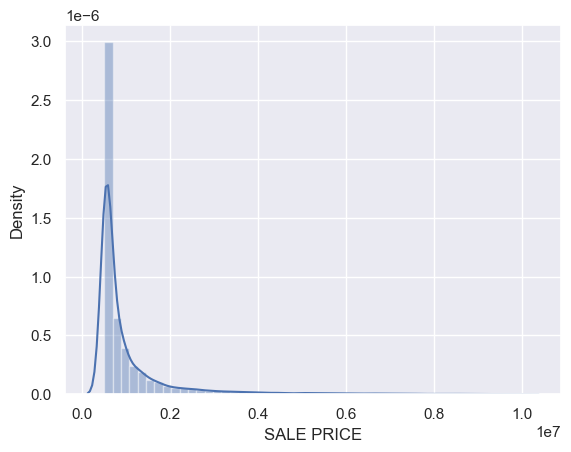

In [49]:
sns.distplot(sale['SALE PRICE'])

**Interpretasi:**

Berdasarkan plot distribusi peluang yang terbentuk, dapat terlihat bahwa sebaran data menyerupai sebaran peluang eksponensial. Hal ini dapat terlihat dari ekor kurva yang berada di sebelah kanan.

## Confidence Interval

Confidence Interval adalah  parameter yang digunakan untuk menentukan keakuratan mean suatu sampel. Confidence Interval digunakan yntuk menentukan rentang nilai yang kemungkinan mengandung mean populasi “sebenarnya” berdasarkan sampel.

Nilai Confidence Interval dapat diperoleh menggunakan rumus:

$CI : mean \pm z-score * standard error$

Sedangkan nilai Standard Error dapat diperoleh menggunakan rumus:

$SE = \frac {standard  deviation}{\sqrt{n}}$

- $n$ : banyaknya data

### Case 6

Tentukan Confidence Interval harga penjualan properti di NYC pada rentang harga 500000 USD hingga 10000000 USD (Gunakan $\alpha$ = 5%).

Untuk mendapatkan mean dari harga properti di NYC pada rentang harga 500000 USD hingga 10000000 USD, digunakan dataframe `sale` yang telah didefinisikan sebelumnya. Dataframe perlu di-slicing berdasarkan kolom `SALE PRICE` kemudian digunakan fungsi `.mean()` untuk memperoleh nilai mean.

Untuk mendapatkan nilai standar deviasi dari harga properti di NYC pada rentang harga 500000 USD hingga 10000000 USD, digunakan dataframe `sale` yang telah didefinisikan sebelumnya. Dataframe perlu di-slicing berdasarkan kolom `SALE PRICE` kemudian digunakan fungsi `.std()` untuk memperoleh nilai standar deviasi. Nilai standar deviasi akan digunakan untuk memperoleh nilai standard error.

Mendefinisikan `se` sebagai nilai standar error.

Mendefinisikan nilai z-score dari $\alpha$ yang digunakan yaitu 1.96.

Batas bawah Confidence Interval didefinisikan sebagai `lower` sedangkan batas atas didefinisikan sebagai `upper`.

In [50]:
sale_mean = sale['SALE PRICE'].mean()
sale_std = sale['SALE PRICE'].std()
se = sale_std/np.sqrt(len(sale))
z = 1.96

lower = sale_mean - z * se
upper = sale_mean + z * se
print('Confidence Interval: ',lower,'-',upper)

Confidence Interval:  1047268.3676718797 - 1065717.9971020867


**Interpretasi:**

Berdasarkan hasil perhitungan, diperoleh hasil bahwa rata-rata harga jual tanah di NYC berkisar antara 1047268.3676718797 USD sampai dengan 1065717.9971020867 USD

## Hypothesis Testing

Hypothesis Testing atau Uji Hipotesis merupakan suatu cara pengujian hasil survei atau eksperimen untuk melihat apakah hasil yang diperoleh signifikan.

### Case 7

Ingin diketahui apakah terdapat perbedaan rata-rata penjualan total unit properti di wilayah Manhattan dan Brooklyn (Gunakan $\alpha = 5\%$).

Hipotesis:

$h_0 : \mu_1 = \mu_2$

$h_1 : \mu_1 \neq \mu_2$

Untuk mendapatkan data yang diperlukan, perlu dilakukan slicing pada dataframe `df_nyc` dengan syarat `BOROUGH NAME == 'Manhattan'`. Kemudian data disimpan dalam dataframe baru bernama `tu_manhattan`.

In [51]:
tu_manhattan = df_nyc[df_nyc['BOROUGH NAME'] == 'Manhattan']
tu_manhattan

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH NAME
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,Manhattan
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,533000.0,2016-12-14,Manhattan
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,533000.0,2016-12-09,Manhattan
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,Manhattan
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18097,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2154,18,G9,552 WEST 182 STREET,10033,0,1,1,1260.0,1080.0,1990,4,G9,533000.0,2016-11-16,Manhattan
18098,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,2170,383,V1,WADSWORTH TERRACE,0,0,0,0,13000.0,1680.0,0,4,V1,7500000.0,2016-11-01,Manhattan
18099,WASHINGTON HEIGHTS UPPER,33 EDUCATIONAL FACILITIES,4,2149,23,W2,2495 AMSTERDAM AVENUE,10033,0,1,1,29775.0,253942.0,1969,4,W2,533000.0,2017-04-21,Manhattan
18100,WASHINGTON HEIGHTS UPPER,33 EDUCATIONAL FACILITIES,4,2156,48,W6,2520 AMSTERDAM AVENUE,10033,0,1,1,25875.0,140260.0,1967,4,W6,533000.0,2017-04-21,Manhattan


Untuk mendapatkan data yang diperlukan, perlu dilakukan slicing pada dataframe `df_nyc` dengan syarat `BOROUGH NAME == 'Brooklyn'`. Kemudian data disimpan dalam dataframe baru bernama `tu_brooklyn`.

In [52]:
tu_brooklyn = df_nyc[df_nyc['BOROUGH NAME'] == 'Brooklyn']
tu_brooklyn

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH NAME
25096,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,157,A5,36 BAY 10TH STREET,11228,1,0,1,1547.0,1428.0,1930,1,A5,800000.0,2017-02-27,Brooklyn
25097,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,20,A5,47 BAY 10TH STREET,11228,1,0,1,1933.0,1660.0,1930,1,A5,533000.0,2017-03-04,Brooklyn
25098,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6364,2,A5,1649 BENSON AVENUE,11214,1,0,1,1638.0,972.0,1930,1,A5,533000.0,2016-10-06,Brooklyn
25099,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367,42,S1,1730 86TH STREET,11214,1,1,2,1342.0,1920.0,1926,1,S1,1200000.0,2017-03-31,Brooklyn
25100,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,67,S1,8642 20TH AVENUE,11214,1,1,2,1740.0,3240.0,1925,1,S1,1090000.0,2016-10-24,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48934,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3189,1,Z9,35 WYCKOFF AVENUE,11237,0,0,0,2431.0,0.0,0,4,Z9,5650000.0,2017-05-04,Brooklyn
48935,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3189,2,Z9,33 WYCKOFF AVENUE,11237,0,0,0,2415.0,0.0,0,4,Z9,533000.0,2017-05-04,Brooklyn
48936,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3189,3,Z9,33A WYCKOFF AVENUE,11237,0,0,0,2390.0,0.0,0,4,Z9,533000.0,2017-05-04,Brooklyn
48937,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3280,50,Z9,383 HARMAN STREET,11237,0,0,0,2765.0,0.0,0,4,Z9,2825000.0,2017-03-28,Brooklyn


Menghitung statistik uji dan p-value menggunakan fungsi `sm.stats.ztest()` pada dataframe baru bernama `tu_manhattan` dan `tu_brooklyn` menggunakan kolom `TOTAL UNITS`. Digunakan parameter `alternative='two-sided'` karena akan diperiksa ketidaksamaan antar dua sampel.

Menggunakan IF, apabila p_value bernilai lebih dari 0.05, maka akan muncul keterangan `Accept Null Hypothesis (h0)`. Apabila p_value kurang dari 0.05 maka akan muncul keterangan `Reject Null Hypothesis (h0)`. Nilai 0.05 adalah alpha ($\alpha$) atau tingkat kesalahan.

In [53]:
statistics,p_value = sm.stats.ztest(tu_manhattan['TOTAL UNITS'],tu_brooklyn['TOTAL UNITS'],alternative='two-sided')
print('statistics = %.3f, p_value = %.3f' % (statistics, p_value))
if p_value > 0.05:
  print('Accept Null Hypothesis (h0)')
else:
  print('Reject Null Hypothesis (h0)')

statistics = 2.456, p_value = 0.014
Reject Null Hypothesis (h0)


**Interpretasi:**

Berdasarkan hasil perhitungan, diperoleh p-value sebesar 0.014. P-value < $\alpha$, maka $h_0$ ditolak. Dapat disimpulkan bahwa terdapat perbedaan rata-rata penjualan total unit properti di wilayah Manhattan dan Brooklyn.

### Case 8

Menggunakan Shapiro-Wilk Test, ingin diketahui apakah data harga penjualan unit properti di NYC (SALE PRICE) mengikuti sebaran normal (Gunakan $\alpha = 5\%$).

Hipotesis:

$h_0$: data mengikuti sebaran normal

$h_1$: data tidak mengikuti sebaran normal

Untuk menganalisis kenormalan data menggunakan uji Shapiro Wilk, perlu dilakukan import library `from scipy.stats import shapiro` terlebih dahulu.

In [54]:
from scipy.stats import shapiro

Menghitung statistik uji dan p-value menggunakan fungsi `shapiro()` pada dataframe `df_NYC` menggunakan kolom `TOTAL UNITS`.

Menggunakan fungsi IF, apabila p_value bernilai lebih dari 0.05, maka akan muncul keterangan `Accept Null Hypothesis (h0)`. Apabila p_value kurang dari 0.05 maka akan muncul keterangan `Reject Null Hypothesis (h0)`. Nilai 0.05 adalah alpha ($\alpha$) atau tingkat kesalahan.

In [55]:
statistics, p_value = shapiro(df_nyc['SALE PRICE'])
print('statistics = %.3f, p_value = %.3f' % (statistics, p_value))
if p_value > 0.05:
  print('Accept Null Hypothesis (h0)')
else:
  print('Reject Null Hypothesis (h0)')

statistics = 0.032, p_value = 0.000
Reject Null Hypothesis (h0)


C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Interpretasi:**

Berdasarkan hasil perhitungan, diperoleh p-value sebesar 0.00 (p-value sangat kecil). P-value < $\alpha$, maka $h_0$ ditolak. Dapat disimpulkan bahwa data tidak mengikuti sebaran normal.